# K-means Clustering

In [30]:
import pandas as pd
import warnings 
# import geopandas as gpd
import numpy as np
# from shapely.geometry import Polygon, LineString, Point
warnings.filterwarnings(action='ignore')

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
from sklearn.preprocessing import StandardScaler

plt.rcParams['font.family'] = 'Malgun Gothic'

In [31]:
df=pd.read_csv('경감지수_전처리2.csv', encoding='utf-8').iloc[:,:-1]
labels= np.array(df['학교명'])
df

,구,학교명,학교코드,내부상담_실시여부,외부상담_실시여부,wee클래스_운영여부,학교폭력_예방교육_평균교육시간(1학급당),위도,경도,법정동코드,500미터내_파출소개수,방범용CCTV
0,강남구,개포고등학교,S010000373,1,1,1,382.4,37.484959,127.059405,1168010300,0,4525
1,강남구,경기고등학교,S010000375,1,0,1,152.4,37.517566,127.056074,1168010500,1,4525
2,강남구,경기여자고등학교,S010000376,1,1,1,200.0,37.486887,127.065567,1168010300,0,4525
3,강남구,국립국악고등학교,S000003540,0,0,0,217.4,37.476230,127.051476,1168010300,1,4525
4,강남구,단국대학교부속소프트웨어고등학교,S010000581,0,1,0,300.0,37.495617,127.057767,1168010600,0,4525
...,...,...,...,...,...,...,...,...,...,...,...,...
315,성동구,무학여자고등학교,S010000436,1,1,1,253.3,37.556768,127.033599,1120010700,1,2834
316,성동구,서울방송고등학교,S010000585,1,1,1,87.6,37.547773,127.011036,1120011300,1,2834
317,성동구,성수고등학교,S010005523,1,1,1,406.6,37.547342,127.038253,1120011400,0,2834
318,성동구,성수공업고등학교,S010000592,1,0,1,306.5,37.540540,127.051298,1120011500,1,2834


In [32]:
school_info = df[['학교명','학교코드']]
school_info

,학교명,학교코드
0,개포고등학교,S010000373
1,경기고등학교,S010000375
2,경기여자고등학교,S010000376
3,국립국악고등학교,S000003540
4,단국대학교부속소프트웨어고등학교,S010000581
...,...,...
315,무학여자고등학교,S010000436
316,서울방송고등학교,S010000585
317,성수고등학교,S010005523
318,성수공업고등학교,S010000592


In [33]:
total=df.loc[:,['내부상담_실시여부','외부상담_실시여부','wee클래스_운영여부','학교폭력_예방교육_평균교육시간(1학급당)','500미터내_파출소개수','방범용CCTV']]
total

,내부상담_실시여부,외부상담_실시여부,wee클래스_운영여부,학교폭력_예방교육_평균교육시간(1학급당),500미터내_파출소개수,방범용CCTV
0,1,1,1,382.4,0,4525
1,1,0,1,152.4,1,4525
2,1,1,1,200.0,0,4525
3,0,0,0,217.4,1,4525
4,0,1,0,300.0,0,4525
...,...,...,...,...,...,...
315,1,1,1,253.3,1,2834
316,1,1,1,87.6,1,2834
317,1,1,1,406.6,0,2834
318,1,0,1,306.5,1,2834


## 표준화

In [34]:
sd = StandardScaler()
total_sd=pd.DataFrame(sd.fit_transform(total))
total_sd.index = labels
total_sd.head()

,0,1,2,3,4,5
개포고등학교,0.399275,0.562914,0.548464,0.047926,-0.851361,2.746195
경기고등학교,0.399275,-1.776470,0.548464,-0.752752,0.560222,2.746195
경기여자고등학교,0.399275,0.562914,0.548464,-0.587046,-0.851361,2.746195
국립국악고등학교,-2.504541,-1.776470,-1.823273,-0.526473,0.560222,2.746195
단국대학교부속소프트웨어고등학교,-2.504541,0.562914,-1.823273,-0.238925,-0.851361,2.746195


## 최적 K 개수 산출

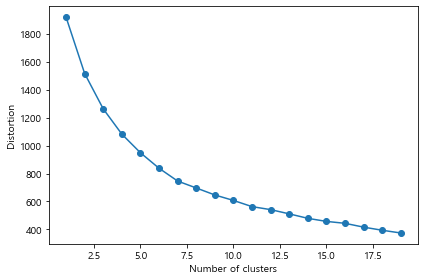

In [35]:
dist =[]
for i in range(1,20):
    k = KMeans(n_clusters=i,
          init='k-means++',
           n_init=10,
           max_iter=300,
           random_state=0)
    k.fit(total_sd)
    dist.append(k.inertia_)

plt.plot(range(1,20),dist, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

## k 선택

In [36]:
np.random.seed(1234)
total_sd_arr = total_sd.values

# k값을 5로 설정 후 k-means에 적용시키기
kmeans = KMeans(n_clusters=5, random_state=2021).fit(total_sd_arr)
kmeans.cluster_centers_

array([[ 3.99274705e-01,  5.33671930e-01,  2.22350362e-01,
        -1.53548612e-01,  1.05427611e+00, -4.52896335e-01],
       [ 3.99274705e-01,  5.62914228e-01,  3.45172467e-01,
        -3.95961098e-01, -7.43811858e-01,  2.29339661e-01],
       [ 3.99274705e-01, -1.77646958e+00,  6.60770003e-02,
        -5.14119398e-02, -3.79063889e-02, -3.69984777e-02],
       [-2.50454133e+00, -2.87770792e-01, -1.12253243e+00,
        -1.65899000e-01,  4.69190967e-02,  3.26729691e-01],
       [ 3.99274705e-01,  4.89808484e-01, -2.66820435e-01,
         2.00602077e+00, -1.89681476e-01, -1.31730811e-03]])

## 군집화

In [37]:
total_sd['cluster'] = kmeans.labels_
total_sd

,0,1,2,3,4,5,cluster
개포고등학교,0.399275,0.562914,0.548464,0.047926,-0.851361,2.746195,1
경기고등학교,0.399275,-1.776470,0.548464,-0.752752,0.560222,2.746195,2
경기여자고등학교,0.399275,0.562914,0.548464,-0.587046,-0.851361,2.746195,1
국립국악고등학교,-2.504541,-1.776470,-1.823273,-0.526473,0.560222,2.746195,3
단국대학교부속소프트웨어고등학교,-2.504541,0.562914,-1.823273,-0.238925,-0.851361,2.746195,3
...,...,...,...,...,...,...,...
무학여자고등학교,0.399275,0.562914,0.548464,-0.401498,0.560222,0.782499,0
서울방송고등학교,0.399275,0.562914,0.548464,-0.978335,0.560222,0.782499,1
성수고등학교,0.399275,0.562914,0.548464,0.132172,-0.851361,0.782499,1
성수공업고등학교,0.399275,-1.776470,0.548464,-0.216297,0.560222,0.782499,2


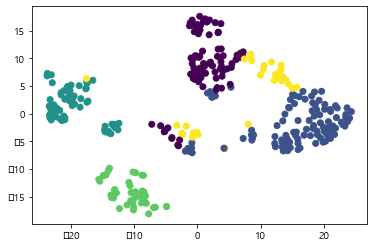

In [38]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

model = TSNE(learning_rate=100)
transformed = model.fit_transform(total_sd.iloc[:,:6])

xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys,c=kmeans.labels_)

plt.show()

In [39]:
total_sd.reset_index(inplace=True)
total_sd.rename(columns={'index': '학교명', 0: '내부상담_실시여부', 1: '외부상담_실시여부', 2: 'wee클래스_운영여부',
                         3: '학교폭력_예방교육_평균교육시간(1학급당)', 4: '500미터내_파출소개수', 5: '방범용CCTV'}, inplace=True)
total_sd

,학교명,내부상담_실시여부,외부상담_실시여부,wee클래스_운영여부,학교폭력_예방교육_평균교육시간(1학급당),500미터내_파출소개수,방범용CCTV,cluster
0,개포고등학교,0.399275,0.562914,0.548464,0.047926,-0.851361,2.746195,1
1,경기고등학교,0.399275,-1.776470,0.548464,-0.752752,0.560222,2.746195,2
2,경기여자고등학교,0.399275,0.562914,0.548464,-0.587046,-0.851361,2.746195,1
3,국립국악고등학교,-2.504541,-1.776470,-1.823273,-0.526473,0.560222,2.746195,3
4,단국대학교부속소프트웨어고등학교,-2.504541,0.562914,-1.823273,-0.238925,-0.851361,2.746195,3
...,...,...,...,...,...,...,...,...
315,무학여자고등학교,0.399275,0.562914,0.548464,-0.401498,0.560222,0.782499,0
316,서울방송고등학교,0.399275,0.562914,0.548464,-0.978335,0.560222,0.782499,1
317,성수고등학교,0.399275,0.562914,0.548464,0.132172,-0.851361,0.782499,1
318,성수공업고등학교,0.399275,-1.776470,0.548464,-0.216297,0.560222,0.782499,2


In [40]:
total_sd['cluster'].value_counts()
final = pd.merge(total_sd,school_info,on='학교명',how='left')
final.head()

,학교명,내부상담_실시여부,외부상담_실시여부,wee클래스_운영여부,학교폭력_예방교육_평균교육시간(1학급당),500미터내_파출소개수,방범용CCTV,cluster,학교코드
0,개포고등학교,0.399275,0.562914,0.548464,0.047926,-0.851361,2.746195,1,S010000373
1,경기고등학교,0.399275,-1.776470,0.548464,-0.752752,0.560222,2.746195,2,S010000375
2,경기여자고등학교,0.399275,0.562914,0.548464,-0.587046,-0.851361,2.746195,1,S010000376
3,국립국악고등학교,-2.504541,-1.776470,-1.823273,-0.526473,0.560222,2.746195,3,S000003540
4,단국대학교부속소프트웨어고등학교,-2.504541,0.562914,-1.823273,-0.238925,-0.851361,2.746195,3,S010000581


In [41]:
Alleviate_score = final.groupby('cluster').mean()

In [42]:
Alleviate_score
# 

,내부상담_실시여부,외부상담_실시여부,wee클래스_운영여부,학교폭력_예방교육_평균교육시간(1학급당),500미터내_파출소개수,방범용CCTV
cluster,,,,,,
0,0.399275,0.533672,0.222350,-0.153549,1.054276,-0.452896
1,0.399275,0.562914,0.345172,-0.395961,-0.743812,0.229340
2,0.399275,-1.776470,0.066077,-0.051412,-0.037906,-0.036998
3,-2.504541,-0.287771,-1.122532,-0.165899,0.046919,0.326730
4,0.399275,0.489808,-0.266820,2.006021,-0.189681,-0.001317


## 결과해석

**CCTV 빈약 => 1, 3, 2, 4, 0**

**상담 체계 빈약 => 4, 0, 3, 1, 2**

- cluster 0 : 학내외 상담, 예방교육 체계가 빈약. 학교 주변 파출소 적음 CCTV 개수 매우 많은 학교
- cluster 1 : 학내외 상담, 예방교육 체계가 갖추어져 있음. 학교 주변 파출소 매우 많음. CCTV 개수 매우 적은 학교
- cluster 2 : 학내외 상담, 예방교육 체계가 갖추어져 있음. 학교 주변 파출소 매우 적음. CCTV 상대적으로 적은 학교
- cluster 3 : 학내 상담 체계 갖추었으나 학외 상담 빈약. 학교 주변 파출소 상대적으로 적음. CCTV 상대적으로 적은 학교    
- cluster 4 : 학내 상담, 예방교육 체계가 매우 빈약. 학교 주변 파출소 상대적으로 적음. CCTV 상대적으로 적은 학교

# 경감지표 점수 산출

## 1차 점수 산출

In [43]:
rank = Alleviate_score.sort_values('방범용CCTV').index
rank

Int64Index([0, 2, 4, 1, 3], dtype='int64', name='cluster')

In [44]:
final['score_1st'] = ''
for i in range(len(final)):
    if final['cluster'][i]==rank[0]:
        final['score_1st'][i]=0.2
    elif final['cluster'][i]==rank[1]:
        final['score_1st'][i]=0.4
    elif final['cluster'][i]==rank[2]:
        final['score_1st'][i]=0.6
    elif final['cluster'][i]==rank[3]:
        final['score_1st'][i]=0.8
    elif final['cluster'][i]==rank[4]:
        final['score_1st'][i]=1    

In [45]:
print(len(final.loc[final['score_1st']==0.2]))
print(len(final.loc[final['score_1st']==0.4]))
print(len(final.loc[final['score_1st']==0.6]))
print(len(final.loc[final['score_1st']==0.8]))
print(len(final.loc[final['score_1st']==1]))

80
59
32
105
44


In [46]:
final.to_csv('final.csv',encoding='cp949')

In [47]:
dd = pd.read_csv('final.csv',encoding='cp949')
dd

,Unnamed: 0,학교명,내부상담_실시여부,외부상담_실시여부,wee클래스_운영여부,학교폭력_예방교육_평균교육시간(1학급당),500미터내_파출소개수,방범용CCTV,cluster,학교코드,score_1st
0,0,개포고등학교,0.399275,0.562914,0.548464,0.047926,-0.851361,2.746195,1,S010000373,0.8
1,1,경기고등학교,0.399275,-1.776470,0.548464,-0.752752,0.560222,2.746195,2,S010000375,0.4
2,2,경기여자고등학교,0.399275,0.562914,0.548464,-0.587046,-0.851361,2.746195,1,S010000376,0.8
3,3,국립국악고등학교,-2.504541,-1.776470,-1.823273,-0.526473,0.560222,2.746195,3,S000003540,1.0
4,4,단국대학교부속소프트웨어고등학교,-2.504541,0.562914,-1.823273,-0.238925,-0.851361,2.746195,3,S010000581,1.0
...,...,...,...,...,...,...,...,...,...,...,...
315,315,무학여자고등학교,0.399275,0.562914,0.548464,-0.401498,0.560222,0.782499,0,S010000436,0.2
316,316,서울방송고등학교,0.399275,0.562914,0.548464,-0.978335,0.560222,0.782499,1,S010000585,0.8
317,317,성수고등학교,0.399275,0.562914,0.548464,0.132172,-0.851361,0.782499,1,S010005523,0.8
318,318,성수공업고등학교,0.399275,-1.776470,0.548464,-0.216297,0.560222,0.782499,2,S010000592,0.4


## 2차 점수 산출

In [48]:
ingu = pd.read_csv('서울시_청소년인구통계.txt', delimiter='\t')[['지역','0세-18세']][2:].reset_index(drop=True)
ingu.columns=['구','청소년인구수']

In [49]:
police = pd.read_csv('경찰관서_2019.csv', encoding='cp949', index_col=0)[1:].reset_index(drop=True)
police['지구대_파출소_총합']=police['경찰서']+police['지구대파출소치안센터']

In [50]:
score_second = pd.merge(police,ingu,how='inner',on='구')

In [51]:
score_second['청소년인구수'] = score_second['청소년인구수'].str.replace(pat=r'[^A-Za-z0-9]', repl= r'', regex=True)
score_second['청소년인구수']= pd.to_numeric(score_second['청소년인구수'])

In [52]:
score_second['구당_청소년수'] = round(score_second['청소년인구수'] / score_second['지구대_파출소_총합'],2)
score_second = score_second[['구','구당_청소년수']]

In [53]:
temp=pd.read_csv('서울시고등학교_기본정보.csv',encoding='cp949')[['지역','학교명']]
temp.columns=['구','학교명']

In [54]:
score_second = pd.merge(temp, score_second, how='inner', on='구')

In [55]:
score_second

,구,학교명,구당_청소년수
0,강남구,국립국악고등학교,3898.57
1,강남구,개포고등학교,3898.57
2,강남구,경기고등학교,3898.57
3,강남구,경기여자고등학교,3898.57
4,강남구,압구정고등학교,3898.57
...,...,...,...
315,강북구,창문여자고등학교,2322.33
316,강북구,혜화여자고등학교,2322.33
317,강북구,성암국제무역고등학교,2322.33
318,강북구,삼각산고등학교,2322.33


In [56]:
Alleviate_score_2nd = pd.merge(final, score_second,how='left',on='학교명')
Alleviate_score_2nd 

,학교명,내부상담_실시여부,외부상담_실시여부,wee클래스_운영여부,학교폭력_예방교육_평균교육시간(1학급당),500미터내_파출소개수,방범용CCTV,cluster,학교코드,score_1st,구,구당_청소년수
0,개포고등학교,0.399275,0.562914,0.548464,0.047926,-0.851361,2.746195,1,S010000373,0.8,강남구,3898.57
1,경기고등학교,0.399275,-1.776470,0.548464,-0.752752,0.560222,2.746195,2,S010000375,0.4,강남구,3898.57
2,경기여자고등학교,0.399275,0.562914,0.548464,-0.587046,-0.851361,2.746195,1,S010000376,0.8,강남구,3898.57
3,국립국악고등학교,-2.504541,-1.776470,-1.823273,-0.526473,0.560222,2.746195,3,S000003540,1,강남구,3898.57
4,단국대학교부속소프트웨어고등학교,-2.504541,0.562914,-1.823273,-0.238925,-0.851361,2.746195,3,S010000581,1,강남구,3898.57
...,...,...,...,...,...,...,...,...,...,...,...,...
315,무학여자고등학교,0.399275,0.562914,0.548464,-0.401498,0.560222,0.782499,0,S010000436,0.2,성동구,2343.44
316,서울방송고등학교,0.399275,0.562914,0.548464,-0.978335,0.560222,0.782499,1,S010000585,0.8,성동구,2343.44
317,성수고등학교,0.399275,0.562914,0.548464,0.132172,-0.851361,0.782499,1,S010005523,0.8,성동구,2343.44
318,성수공업고등학교,0.399275,-1.776470,0.548464,-0.216297,0.560222,0.782499,2,S010000592,0.4,성동구,2343.44


In [57]:
Alleviate_score_2nd['score_2nd']=''
for i in range(len(Alleviate_score_2nd)):
    for k in range(5):
        rank_lis = sorted(list(set(Alleviate_score_2nd[Alleviate_score_2nd['cluster']==k]['구당_청소년수'])), reverse=True) 
        for j in range(len(rank_lis)): #내림차순 정렬한 리스트의 인덱스 순서대로 적은 점수를 차감
            if Alleviate_score_2nd['구당_청소년수'][i] == rank_lis[j]:
                Alleviate_score_2nd['score_2nd'][i] = round((Alleviate_score_2nd['score_1st'][i]-(j/len(rank_lis))*0.2)*10,2) # 점수 만점을 10점으로 만들기

In [58]:
Alleviate_score_2nd.columns

Index(['학교명', '내부상담_실시여부', '외부상담_실시여부', 'wee클래스_운영여부',
       '학교폭력_예방교육_평균교육시간(1학급당)', '500미터내_파출소개수', '방범용CCTV', 'cluster', '학교코드',
       'score_1st', '구', '구당_청소년수', 'score_2nd'],
      dtype='object')

In [61]:
Alleviate_fin = Alleviate_score_2nd[['학교코드','학교명','구','score_2nd']]
Alleviate_fin = Alleviate_fin.sort_values(by=['score_2nd'], ascending=False)

In [62]:
Alleviate_fin

,학교코드,학교명,구,score_2nd
55,S010000573,명덕외국어고등학교,강서구,10.0
53,S010000431,명덕고등학교,강서구,10.0
49,S010000622,덕원예술고등학교,강서구,10.0
65,S010000655,화곡보건경영고등학교,강서구,10.0
47,S010000413,대일고등학교,강서구,10.0
...,...,...,...,...
218,S010000525,장충고등학교,중구,0.11
215,S010000617,성동글로벌경영고등학교,중구,0.11
211,S010000656,리라아트고등학교,중구,0.11
216,S010000516,이화여자고등학교,중구,0.11
